### Import library

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from io import StringIO
#from sklearn import tree
#from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import KFold
from datetime import datetime as dt
# import seaborn as sns
#from IPython.core.display import Image

### Import data
- input data needed
    - obserbed timeseriese data 
    - albedo/tbb timeseriese data

In [33]:
# only B01, B02
files=['data/April/ts_FREA_H.txt','data/April/ts_rhop_B01.txt']
#files=['data/April/ts_FREA_H.txt','../read_scripts/python/scripts/Himawari8-nczip2txt/result_retrived_nczip2txt_201504_B01_FREA.txt']

In [34]:
# load files
data = [np.loadtxt(f,delimiter="\t", skiprows=1, dtype={'names':('Time','Value'),'formats':('S18','f8')}) for f in files]

/Users/ojt_camp01/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


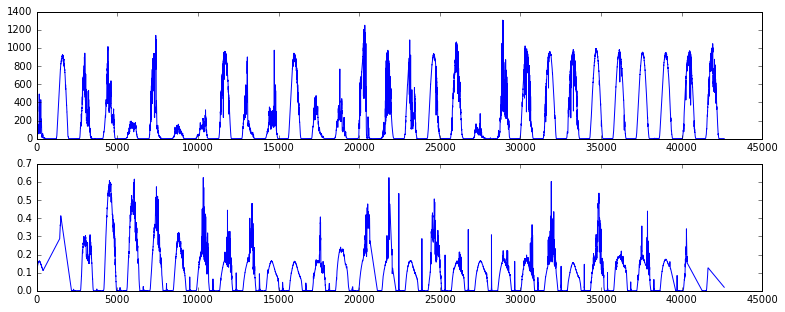

In [35]:
plt.figure(figsize=(13, 5))
# load files
data = [np.loadtxt(f,delimiter="\t", skiprows=1, dtype={'names':('Time','Value'),'formats':('S18','f8')}) for f in files]


data2 = data
DATA_NUM = len(data)
# plot loaded data
labels = ['B01', 'B02','B05']
plt.subplot(2,1,1)
plt.plot(data[0]['Value'],lw=1) # True data
plt.subplot(2,1,2)
[plt.plot(data[i]['Value'], lw=1, ) for i in range(1,DATA_NUM)] # Albedo data
plt.legend()
plt.savefig("FREAbands.png", dpi=250)


# add time column
data = [ d['Value'] for d in data ]

time_data = [dt.strptime(str(d)[3:20], '%d-%b-%Y %H:%M') for d in data2[0]['Time']]
#data.append(np.transpose([d.month for d in time_data]))
data.append(np.transpose([d.day for d in time_data]))
data.append(np.transpose([d.hour for d in time_data]))
data.append(np.transpose([d.minute for d in time_data]))

DATA_NUM = len(data)
#data = data[2500:40000]

In [36]:
[print(np.size(s)) for s in data]

42650
42650
42650
42650
42650


[None, None, None, None, None]

### Devide to train data and test data

In [84]:
idx_c = int((len(data[0])*0.6))
train_data = [d[2500:idx_c] for d in data]
train_label = train_data[0]
train_data = [train_data[i] for i in range(1,DATA_NUM)]

test_data  = [d[idx_c:] for d in data]
true_data = test_data[0]
B01_data = test_data[1] 
B02_data = test_data[2]
B05_data = test_data[3]

test_data = [test_data[i] for i in range(1,DATA_NUM)]

In [85]:
# DEBUG (checking the shape of data)
print(np.shape(np.transpose(train_data)))
print(np.shape(train_label))
print('test data size', np.shape(test_data))
print('true data size',np.shape(true_data))

(23090, 4)
(23090,)
test data size (4, 17060)
true data size (17060,)


In [86]:
train_data

[array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 2,  2,  2, ..., 18, 18, 18]),
 array([17, 17, 17, ..., 18, 18, 18]),
 array([42, 43, 44, ..., 37, 38, 39])]

### Estimation irradiance by Random Forest

In [87]:
estimated = [];
for i in range(0,1): 
    estimator = RandomForestRegressor()
    model = RandomForestRegressor(n_estimators=5, n_jobs=-1)
    model.fit(np.transpose(train_data), np.array(train_label, dtype=np.float64))
    estimated.append(model.predict(np.transpose(test_data)))

#[plt.plot(data) for data in  estimated  ] # FOR DEBUG
#model = GridSearchCV(estimator=estimator, cv=cv, param_grid=[{'n_estimators': [1,5]}] )
#model = ExtraTreesRegressor(n_estimators=10, min_samples_split=20)
#print(np.array(train_label, dtype=np.float32))
#estimator.fit(X_train, y_train)
#estimated = estimator.predict(X_test)

In [88]:
from sklearn.neural_network import BernoulliRBM
estimated = [];
for i in range(0,1): 
    estimator = BernoulliRBM()
    model = RandomForestRegressor(n_estimators=5, n_jobs=-1)
    model.fit(np.transpose(train_data), np.array(train_label, dtype=np.float64))
    estimated.append(model.predict(np.transpose(test_data)))

### Results

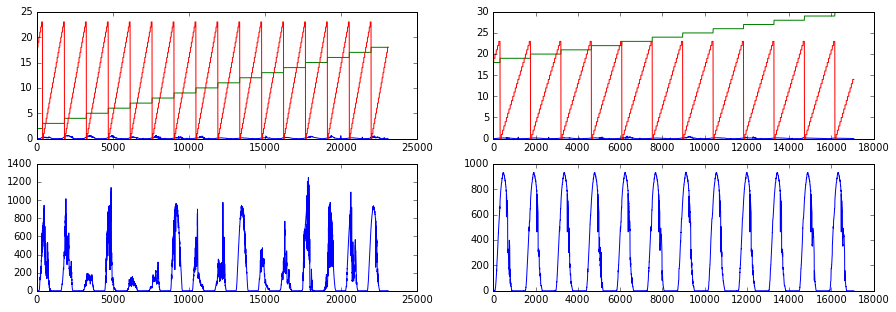

In [89]:
fig=plt.figure(figsize=(15, 5))

plt.subplot(2,2,1)
# [plt.plot(d) for d in X_train]
[plt.plot(d) for d in train_data[0:3]]
plt.subplot(2,2,2)
[plt.plot(d) for d in test_data[0:3]]

plt.subplot(2,2,3)
plt.plot(train_label)

plt.subplot(2,2,4)
plt.plot(estimated[0])
#plt.plot(true_data)
plt.savefig("trainingdata_and_result", dpi=250)


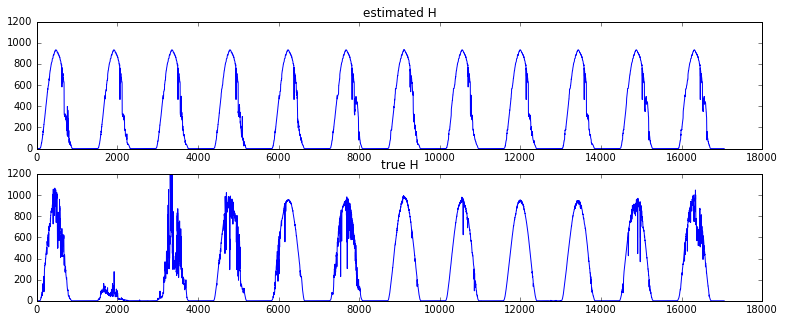

In [90]:
plt.figure(figsize=(13, 5))
plt.subplot(2,1,1)
plt.title("estimated H")
plt.ylim(0,1200)
plt.plot(estimated[0], lw=1)

plt.subplot(2,1,2)
plt.title("true H")
plt.ylim(0,1200)
plt.plot(true_data, lw=1)

#plt.plot(B01_data*1000)
#plt.plot(B02_data*1000)


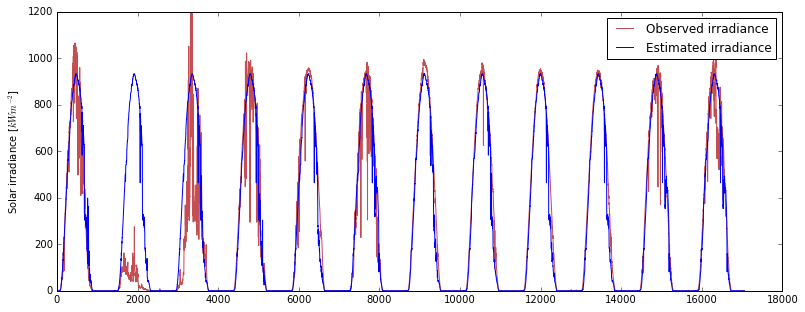

In [91]:
plt.figure(figsize=(13, 5))
plt.title("")
plt.ylim(0,1200)
plt.plot(true_data,  label="Observed irradiance", color='#c44e52',lw=1)
plt.plot(estimated[0],  label="Estimated irradiance", lw=1)
plt.legend()
plt.ylabel(r'Solar irradiance [$kWm^{-2}$]')

plt.savefig("RFestimate_and_observed", dpi=250)


RMSE:
    MAX: 150.836944363
    MIN: 150.836944363
   MEAN: 150.836944363
Coeff:
    MAX: 0.908801712783
    MIN: 0.908801712783
   MEAN: 0.908801712783


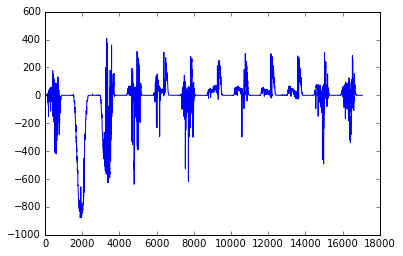

In [92]:
RMSE = [];
Coef = [];
for i in range(len(estimated)):
    error = true_data - estimated[i]
    plt.plot(error,lw=1)
    RMSE.append(np.sqrt(np.mean((error)*(error))))
    std = np.std(error)
    Coef.append(np.corrcoef(true_data, estimated[i])[1][0])
#    print('Coeff:', Coef[i])
#    print("RMSE:",RMSE[i])

    
print('RMSE:')
print('    MAX:', max(RMSE))
print('    MIN:', min(RMSE))
print('   MEAN:', np.mean(RMSE))
print('Coeff:')
print('    MAX:', max(Coef))
print('    MIN:', min(Coef))
print('   MEAN:', np.mean(Coef))

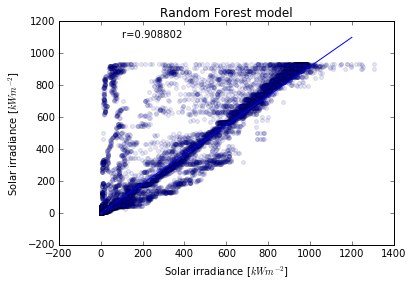

In [93]:
t_est = np.array([1,1200]); t_true = np.array([1,1100]);
plt.scatter(true_data, estimated[0], alpha=0.1, s=15)
plt.plot(t_est,t_true);
plt.ylabel(r'Solar irradiance [$kWm^{-2}$]')
plt.xlabel(r'Solar irradiance [$kWm^{-2}$]')
plt.title('Random Forest model')
plt.text(100,1100,r'r=%f '%(np.corrcoef((true_data, estimated[0]))[0,1]) )
np.correlate(t_est,t_true)
plt.savefig("RFaccuracy", dpi=250)
